In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('MPC15.csv')
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_bp,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestoral,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_hr,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.nunique()

age                     41
sex                      2
chest_pain_type          4
resting_bp              49
cholestoral            152
fasting_blood_sugar      2
restecg                  3
max_hr                  91
exang                    2
oldpeak                 40
slope                    3
num_major_vessels        5
thal                     4
target                   2
dtype: int64

In [7]:
for i in df.columns:
    print(df[i].value_counts())

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64
sex
1    207
0     96
Name: count, dtype: int64
chest_pain_type
0    143
2     87
1     50
3     23
Name: count, dtype: int64
resting_bp
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129 

In [8]:
df.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

age
skew: -0.2


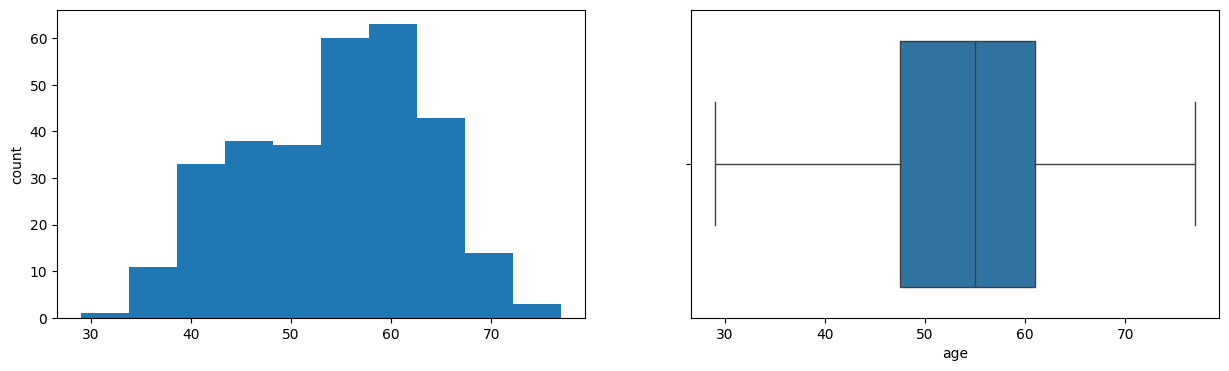

sex
skew: -0.79


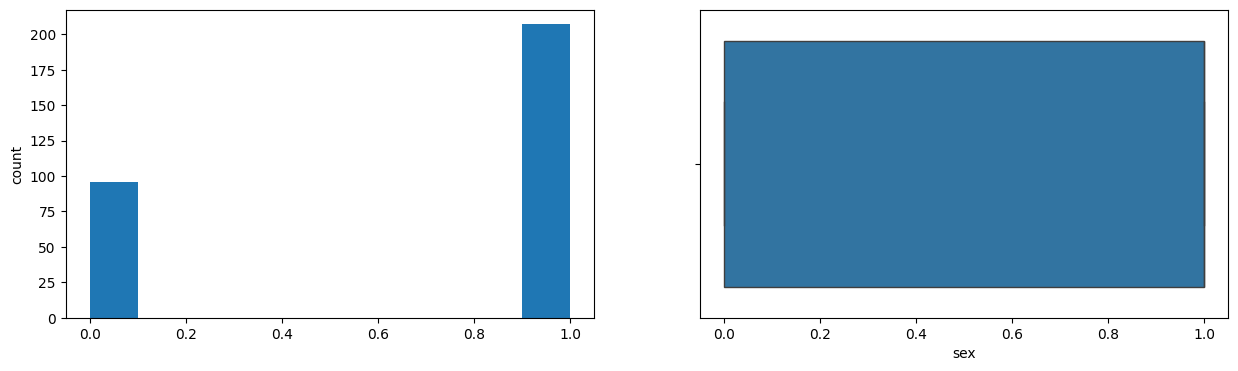

chest_pain_type
skew: 0.48


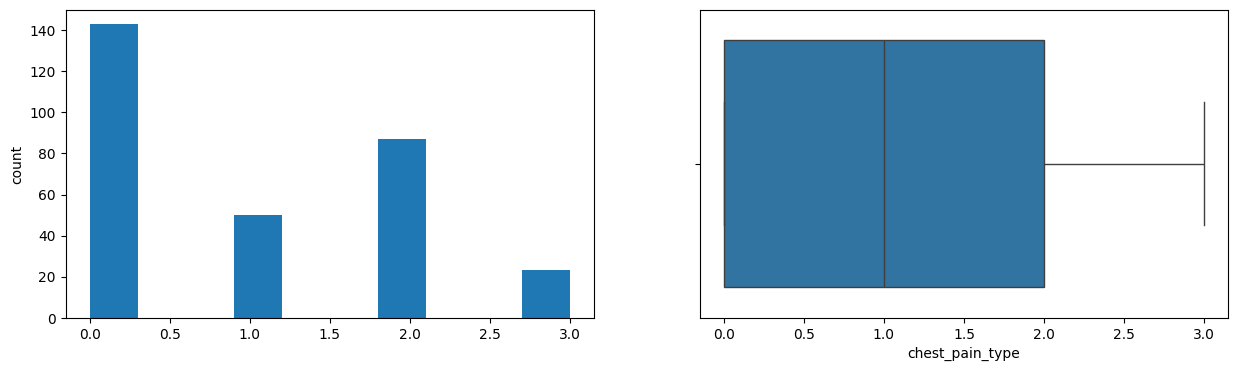

resting_bp
skew: 0.71


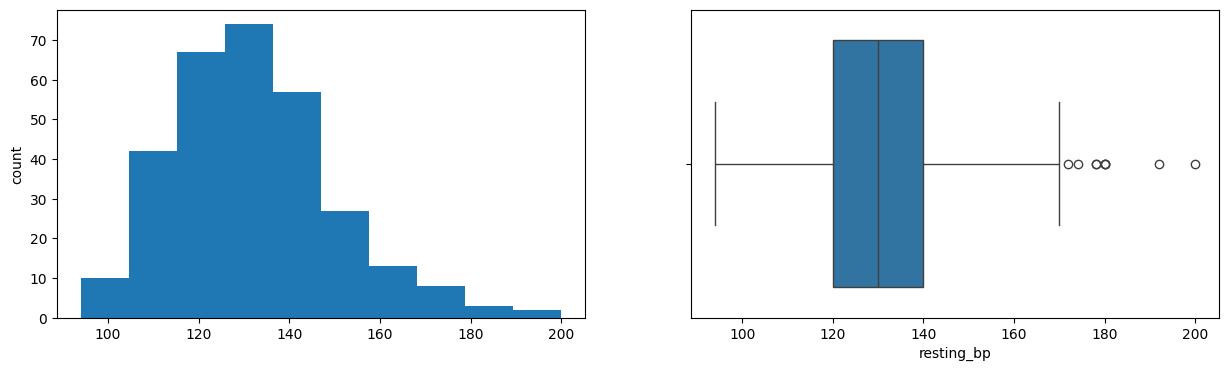

cholestoral
skew: 1.14


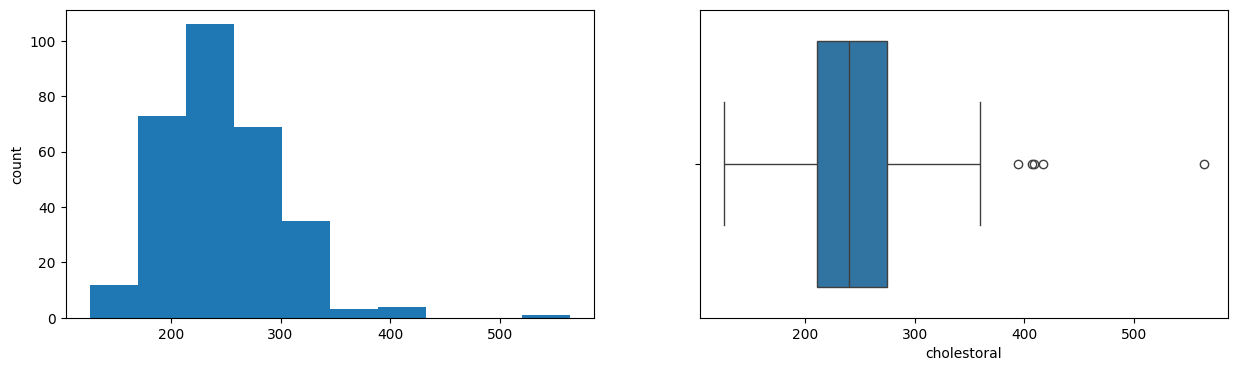

fasting_blood_sugar
skew: 1.99


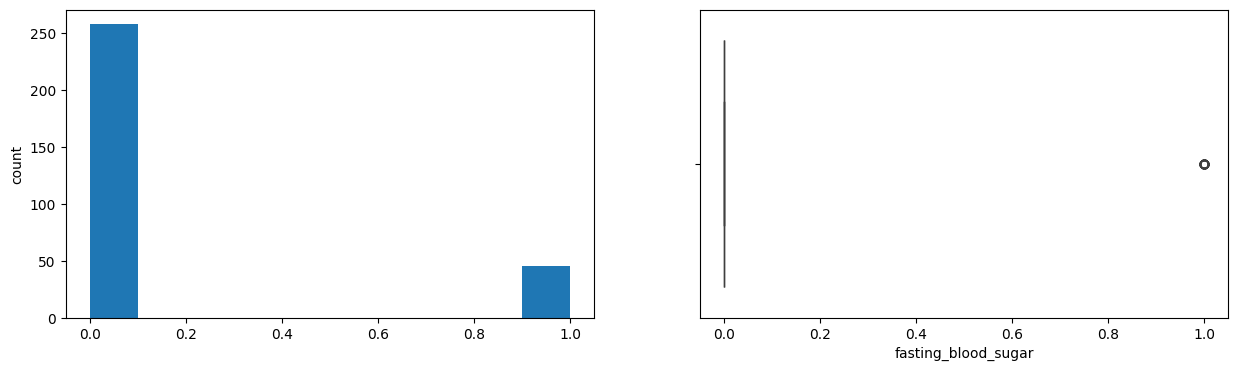

restecg
skew: 0.16


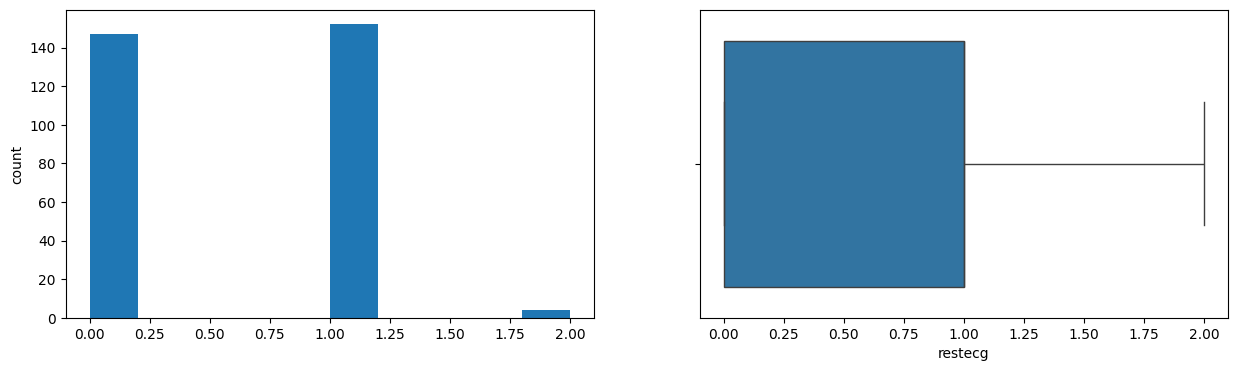

max_hr
skew: -0.54


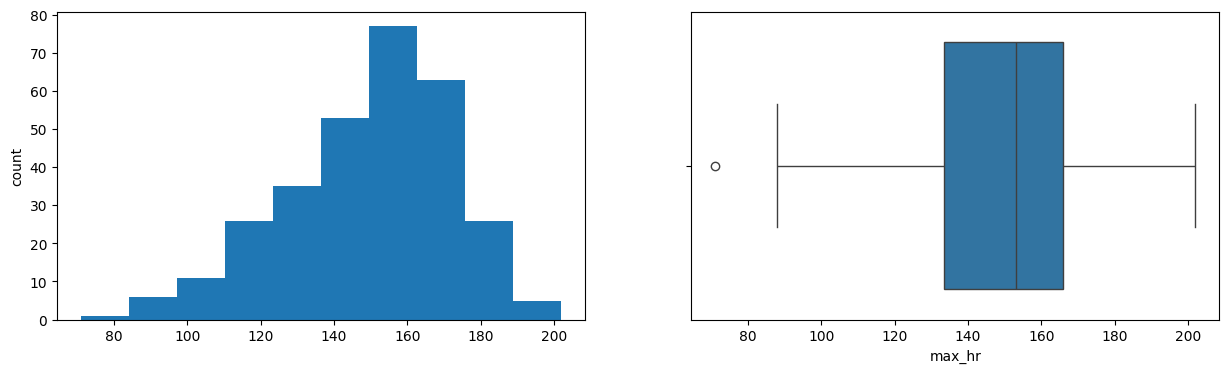

exang
skew: 0.74


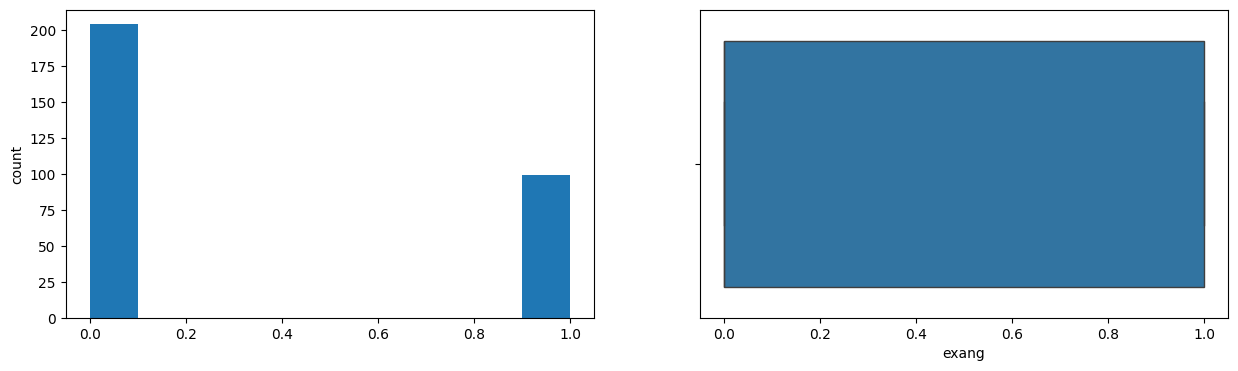

oldpeak
skew: 1.27


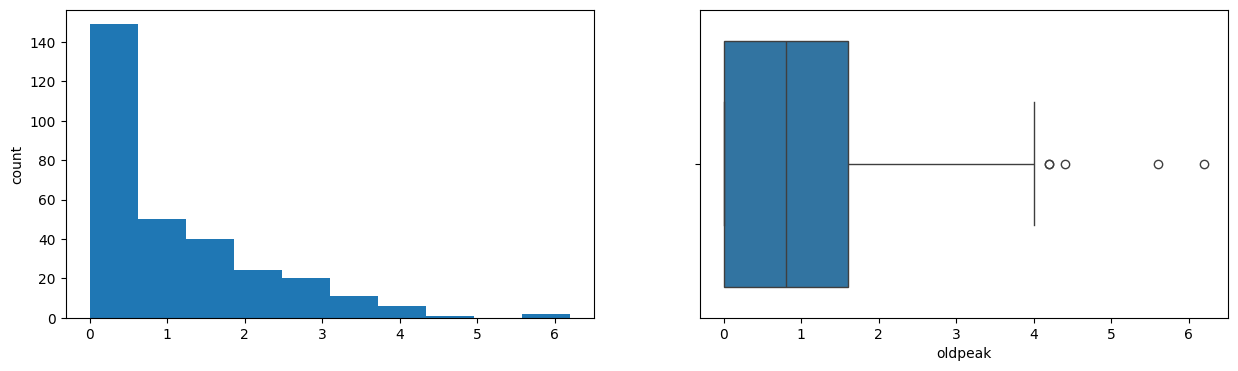

slope
skew: -0.51


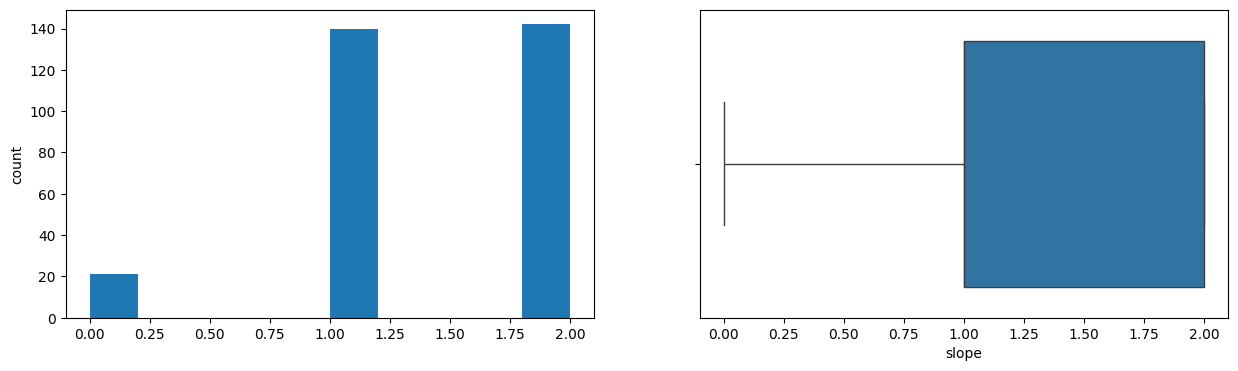

num_major_vessels
skew: 1.31


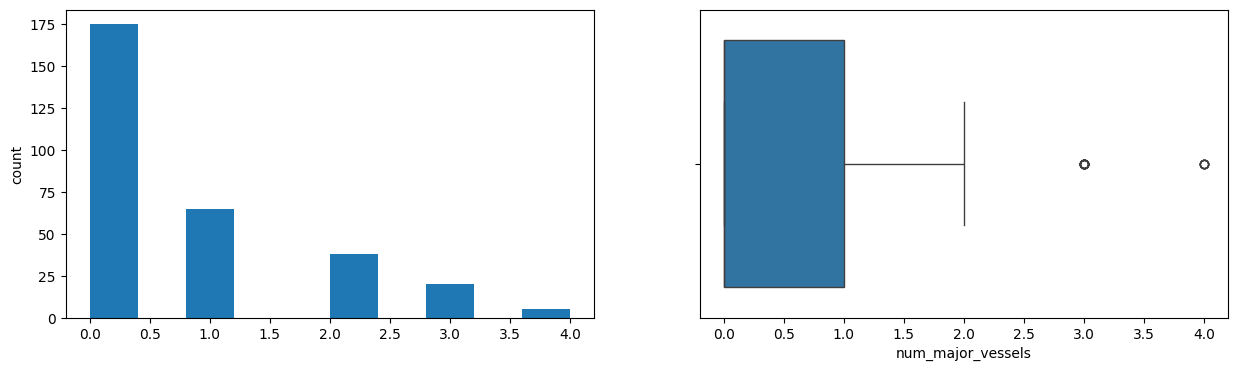

thal
skew: -0.48


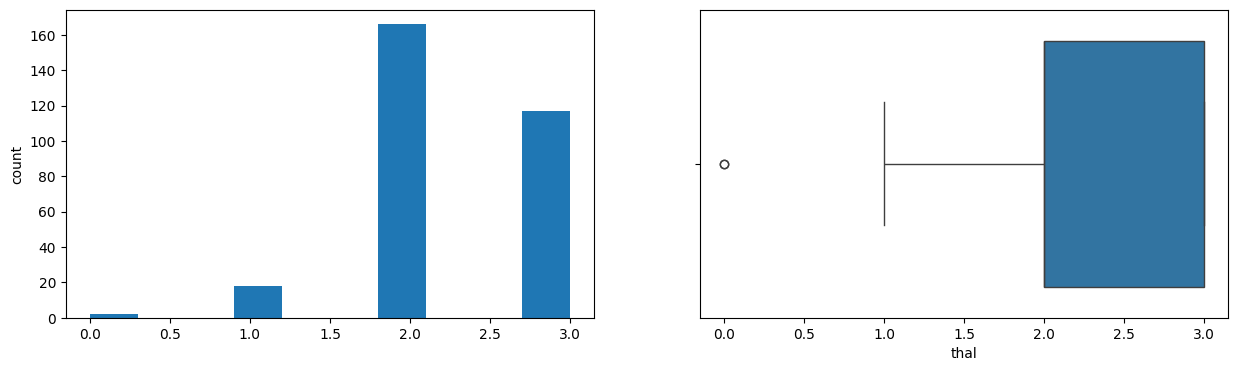

target
skew: -0.18


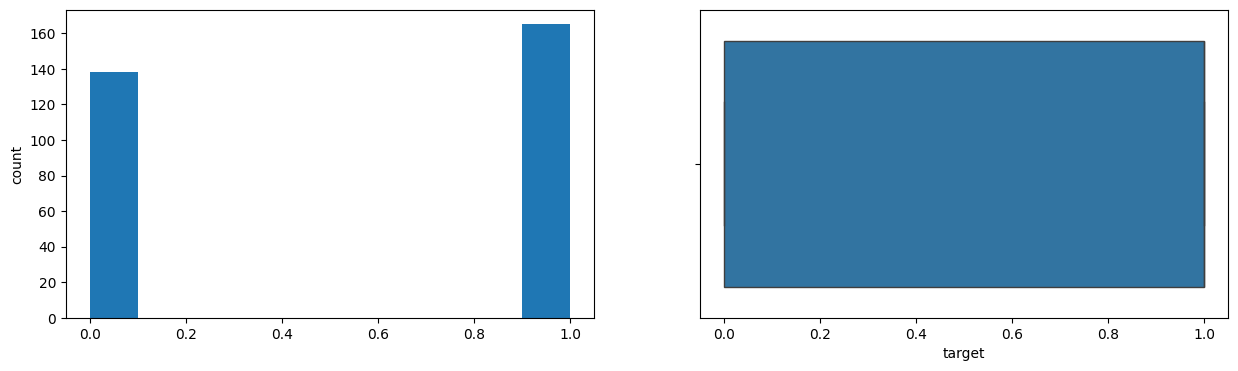

In [9]:
for col in df.columns:
    print(col)
    print('skew:',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()
    

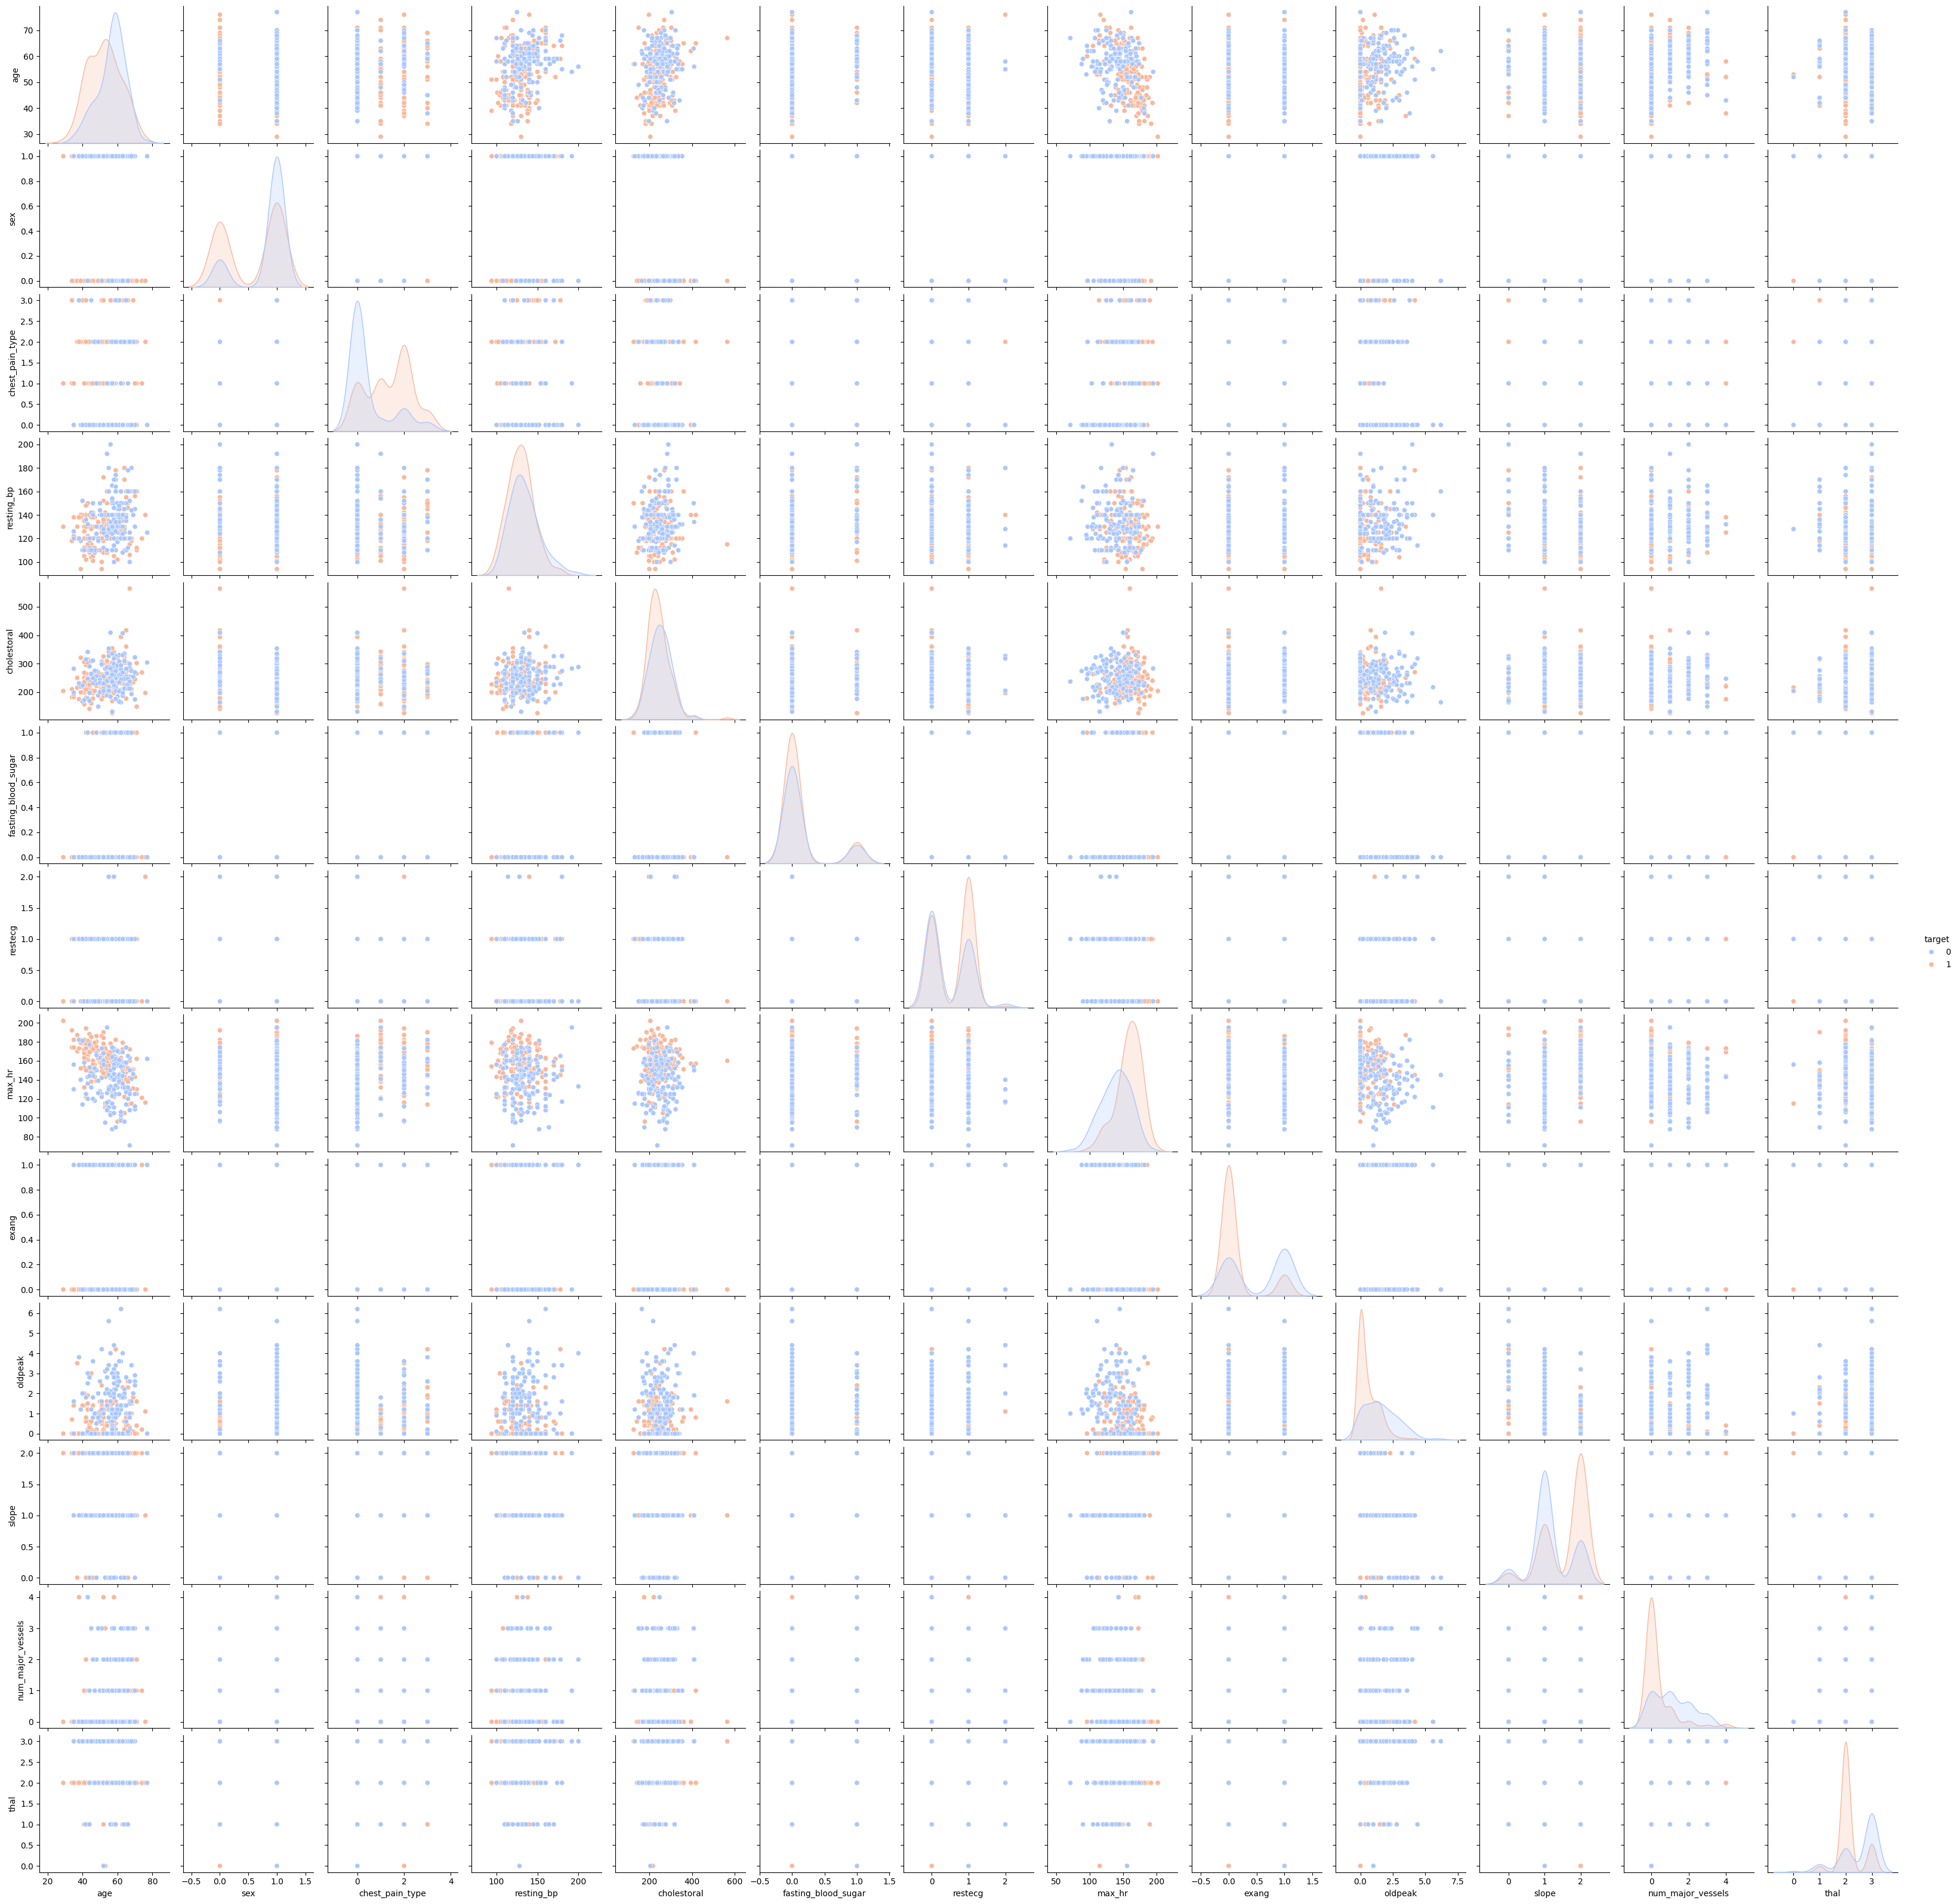

In [10]:
sns.pairplot(df, hue='target', palette='coolwarm')
plt.show()

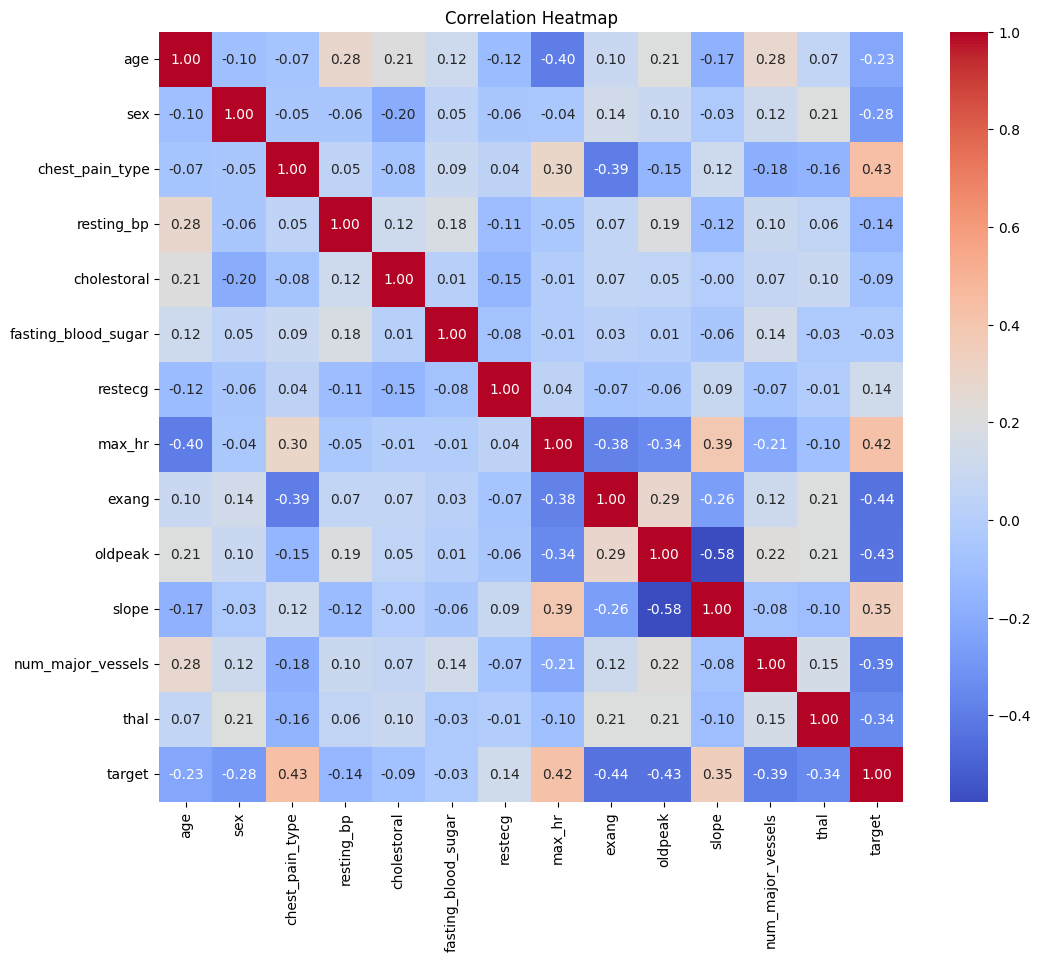

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['chest_pain_type'] = label_encoder.fit_transform(df['chest_pain_type'])
df['restecg'] = label_encoder.fit_transform(df['restecg'])
df['slope'] = label_encoder.fit_transform(df['slope'])
df['thal'] = label_encoder.fit_transform(df['thal'])

# Split the df into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
df

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
# Initialize the model
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print('Logistic Regression Performance:')
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print(f'AUC-ROC Score: {roc_auc_score(y_test, y_pred_logreg)}')


Logistic Regression Performance:
[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

AUC-ROC Score: 0.8102439024390243


In [14]:
# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print('Random Forest Classifier Performance:')
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f'AUC-ROC Score: {roc_auc_score(y_test, y_pred_rf)}')


Random Forest Classifier Performance:
[[33  8]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91

AUC-ROC Score: 0.8324390243902439


In [15]:
# Initialize the model
svc = SVC(probability=True, random_state=42)

# Fit the model
svc.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc.predict(X_test)

# Evaluate the model
print('Support Vector Classifier Performance:')
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))
print(f'AUC-ROC Score: {roc_auc_score(y_test, y_pred_svc)}')


Support Vector Classifier Performance:
[[33  8]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

AUC-ROC Score: 0.8224390243902439


In [16]:
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print('K-Nearest Neighbors Classifier Performance:')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(f'AUC-ROC Score: {roc_auc_score(y_test, y_pred_knn)}')


K-Nearest Neighbors Classifier Performance:
[[35  6]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

AUC-ROC Score: 0.8668292682926828


In [17]:
# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Fit the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print('Decision Tree Classifier Performance:')
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(f'AUC-ROC Score: {roc_auc_score(y_test, y_pred_dt)}')


Decision Tree Classifier Performance:
[[32  9]
 [15 35]]
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91

AUC-ROC Score: 0.7402439024390244


In [18]:
# Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Fit the model
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print('Gradient Boosting Classifier Performance:')
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print(f'AUC-ROC Score: {roc_auc_score(y_test, y_pred_gb)}')


Gradient Boosting Classifier Performance:
[[33  8]
 [12 38]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.77        41
           1       0.83      0.76      0.79        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

AUC-ROC Score: 0.7824390243902439


In [19]:
# Initialize the model
ada = AdaBoostClassifier(random_state=42)

# Fit the model
ada.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada.predict(X_test)

# Evaluate the model
print('AdaBoost Classifier Performance:')
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))
print(f'AUC-ROC Score: {roc_auc_score(y_test, y_pred_ada)}')


AdaBoost Classifier Performance:
[[36  5]
 [13 37]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        41
           1       0.88      0.74      0.80        50

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.82      0.80      0.80        91

AUC-ROC Score: 0.8090243902439025


In [20]:
# Collect AUC-ROC scores for comparison
models = ['Logistic Regression', 'Random Forest', 'Support Vector Classifier', 'K-Nearest Neighbors', 'Decision Tree', 'Gradient Boosting', 'AdaBoost']
scores = [
    roc_auc_score(y_test, logreg.predict(X_test)),
    roc_auc_score(y_test, rf.predict(X_test)),
    roc_auc_score(y_test, svc.predict(X_test)),
    roc_auc_score(y_test, knn.predict(X_test)),
    roc_auc_score(y_test, dt.predict(X_test)),
    roc_auc_score(y_test, gb.predict(X_test)),
    roc_auc_score(y_test, ada.predict(X_test))
]

# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'Model': models,
    'AUC-ROC Score': scores
})

print(comparison_df.sort_values(by='AUC-ROC Score', ascending=False))


                       Model  AUC-ROC Score
3        K-Nearest Neighbors       0.866829
1              Random Forest       0.832439
2  Support Vector Classifier       0.822439
0        Logistic Regression       0.810244
6                   AdaBoost       0.809024
5          Gradient Boosting       0.782439
4              Decision Tree       0.740244


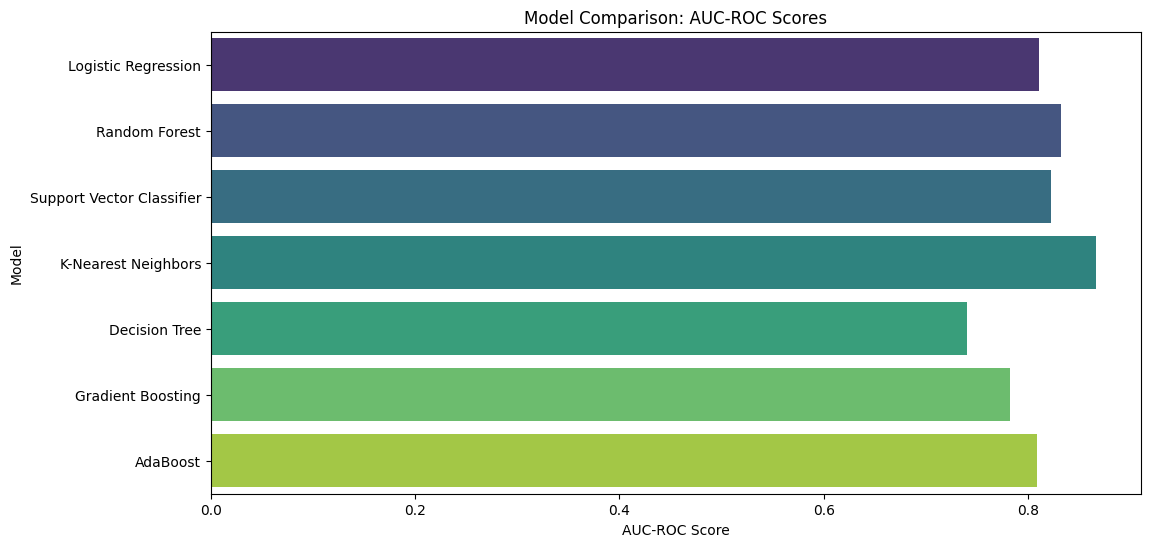

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='AUC-ROC Score', y='Model', data=comparison_df, palette='viridis')
plt.title('Model Comparison: AUC-ROC Scores')
plt.xlabel('AUC-ROC Score')
plt.ylabel('Model')
plt.show()